In [1]:
#import library
#load dataset
#EDA
#Feature Encoding (Label Encoding yapıcaz)
#Missing Data Control
#train test split
#regression model train test
#kategorik hale getir ve classfication model i oluştur


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

#Label Encoding Örnek: Ankara -> 0, İstanbul -> 1, İzmir -> 2
#Ordinal Encoding Örnek: Kötü -> 0, Orta -> 1, İyi -> 2

from sklearn.metrics import mean_squared_error,classification_report
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor



In [3]:
df=pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20231012.csv")

/var/folders/97/hx1gdk894ld8_ffpqcx13mx00000gn/T/ipykernel_9880/3986801120.py:1: DtypeWarning: Columns (10,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021_20231012.csv")


In [4]:
df.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Extreme,Medical,Medicare,Medicaid,NaN,NaN,Y,"320,922.43","60,241.34"
1,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,White,Not Span/Hispanic,...,Moderate,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,Y,"61,665.22","9,180.69"
2,New York City,Bronx,7000006.0,1168.0,Montefiore Medical Center-Wakefield Hospital,18 to 29,104,F,Other Race,Spanish/Hispanic,...,Minor,Minor,Surgical,Medicaid,NaN,NaN,NaN,N,"42,705.34","11,366.5"
3,New York City,Bronx,7000006.0,3058.0,Montefiore Med Center - Jack D Weiler Hosp of ...,70 or Older,104,M,Other Race,Spanish/Hispanic,...,Major,Major,Medical,Medicare,Medicaid,NaN,NaN,Y,"72,700.17","12,111.75"
4,New York City,Bronx,7000006.0,1169.0,Montefiore Medical Center - Henry & Lucy Moses...,50 to 69,104,F,Black/African American,Not Span/Hispanic,...,Moderate,Minor,Medical,Medicare,Medicaid,NaN,NaN,Y,"55,562.51","8,339.72"


In [5]:
#Length Of Stay bizim target değerimiz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101588 entries, 0 to 2101587
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCSR Diagnosis Code                  object 
 15  CCSR Diagnosis Description      

In [6]:
df.describe()

,Operating Certificate Number,Permanent Facility Id,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code
count,2.089497e+06,2.090946e+06,2101588.0,2.101588e+06,2.101588e+06,2.101588e+06
mean,4.990270e+06,1.033841e+03,2021.0,4.141057e+02,1.028546e+01,2.122646e+00
std,2.234939e+06,7.094093e+02,0.0,2.442334e+02,5.961765e+00,9.556966e-01
min,1.010000e+05,1.000000e+00,2021.0,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.951001e+06,5.280000e+02,2021.0,1.940000e+02,5.000000e+00,1.000000e+00
50%,5.902001e+06,1.045000e+03,2021.0,3.830000e+02,9.000000e+00,2.000000e+00
75%,7.002020e+06,1.453000e+03,2021.0,6.400000e+02,1.500000e+01,3.000000e+00
max,7.004010e+06,1.035500e+04,2021.0,9.560000e+02,2.500000e+01,4.000000e+00


In [7]:
los=df["Length of Stay"]
los

0          27
1           4
2           2
3           5
4           3
           ..
2101583     1
2101584    13
2101585     7
2101586     2
2101587     7
Name: Length of Stay, Length: 2101588, dtype: object

In [8]:
df["Length of Stay"]=df["Length of Stay"].replace("120 +",120)
#length of stay sütununu nümerik hale getir çünkü şağıfa çizdiriecez
df["Length of Stay"]=pd.to_numeric(df["Length of Stay"])
los=df["Length of Stay"]

In [9]:
df.isnull().sum()

Hospital Service Area                    10642
Hospital County                          10642
Operating Certificate Number             12091
Permanent Facility Id                    10642
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      45062
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCSR Diagnosis Code                       1634
CCSR Diagnosis Description                1634
CCSR Procedure Code                     576021
CCSR Procedure Description              576021
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

In [10]:
for col in df.columns:
    unique_values=len(df[col].unique())
    print(f"{col}: {unique_values}")

Hospital Service Area: 9
Hospital County: 58
Operating Certificate Number: 169
Permanent Facility Id: 206
Facility Name: 205
Age Group: 5
Zip Code - 3 digits: 51
Gender: 3
Race: 4
Ethnicity: 4
Length of Stay: 120
Type of Admission: 6
Patient Disposition: 19
Discharge Year: 1
CCSR Diagnosis Code: 478
CCSR Diagnosis Description: 478
CCSR Procedure Code: 321
CCSR Procedure Description: 321
APR DRG Code: 334
APR DRG Description: 334
APR MDC Code: 26
APR MDC Description: 26
APR Severity of Illness Code: 5
APR Severity of Illness Description: 5
APR Risk of Mortality: 5
APR Medical Surgical Description: 3
Payment Typology 1: 9
Payment Typology 2: 10
Payment Typology 3: 10
Birth Weight: 131
Emergency Department Indicator: 2
Total Charges: 1818969
Total Costs: 1549652


In [11]:
#patient Disposition daki expired değeriini çıkarıcaz bu değer iptal olmuş dmeek

df=df[df["Patient Disposition"]!="Expired"]
df.shape

(2037764, 33)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Medicare'),
  Text(1, 0, 'Private Health Insurance'),
  Text(2, 0, 'Medicaid'),
  Text(3, 0, 'Blue Cross/Blue Shield'),
  Text(4, 0, 'Self-Pay'),
  Text(5, 0, 'Miscellaneous/Other'),
  Text(6, 0, 'Managed Care, Unspecified'),
  Text(7, 0, 'Department of Corrections'),
  Text(8, 0, 'Federal/State/Local/VA')])

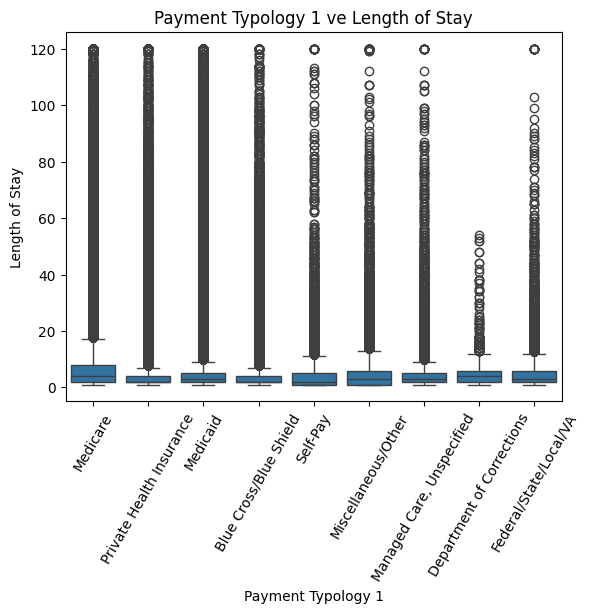

In [12]:
#EDA
"""
hasta_yatis_suresi ile alakalı lan diğer sütunlar
age, type of admission, payment type
"""
sns.boxplot(x= "Payment Typology 1",y= "Length of Stay",data=df)
plt.title("Payment Typology 1 ve Length of Stay")
plt.xticks(rotation=60)

Text(0.5, 1.0, 'Medicare Ödemesi Yapan Yaş Grupları')

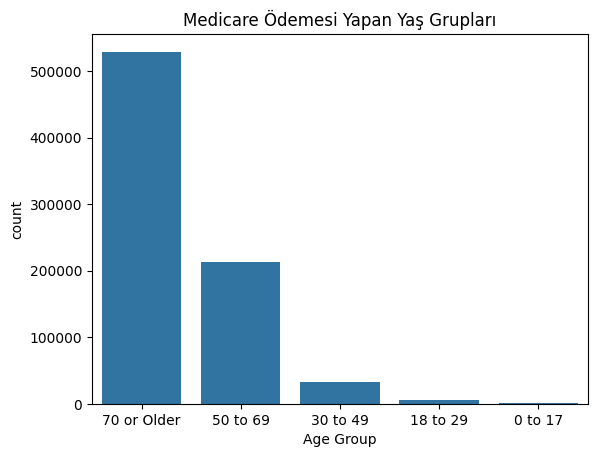

In [13]:
sns.countplot(x="Age Group", data=df[df["Payment Typology 1"]=="Medicare"])
plt.title("Medicare Ödemesi Yapan Yaş Grupları")

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Emergency'),
  Text(1, 0, 'Newborn'),
  Text(2, 0, 'Elective'),
  Text(3, 0, 'Urgent'),
  Text(4, 0, 'Trauma'),
  Text(5, 0, 'Not Available')])

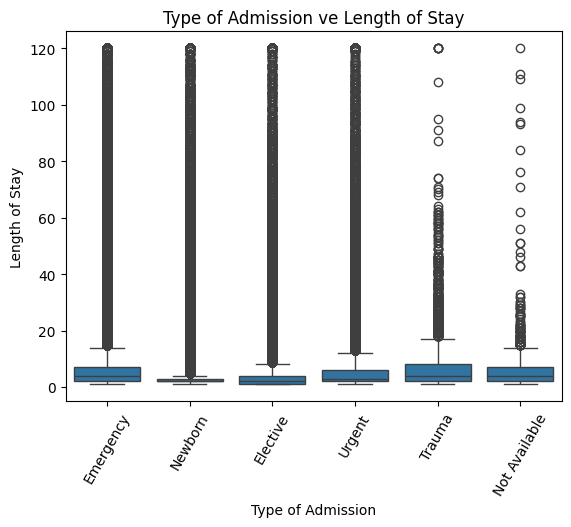

In [14]:
#hastaneye başvurma nedenleri ile length of stay arasındaki ilişki
sns.boxplot(x= "Type of Admission",y= "Length of Stay",data=df)
plt.title("Type of Admission ve Length of Stay")
plt.xticks(rotation=60)

[(0.0, 50.0)]

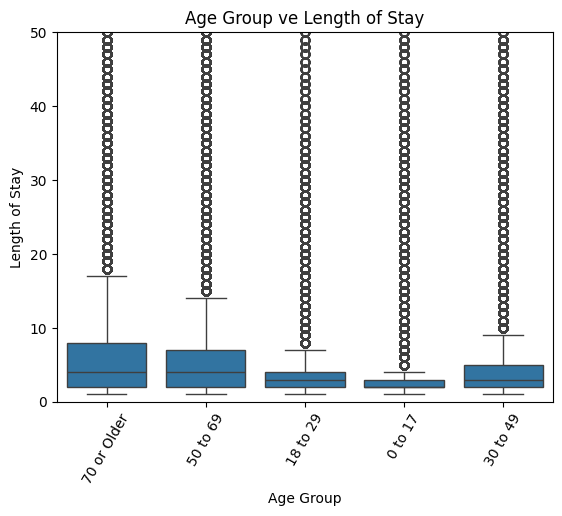

In [15]:
#hyaş grubu ile length of stay arasındaki ilişki
fig,ax=plt.subplots() #gigure ve eksen nesnesi oluşturdum
sns.boxplot(x= "Age Group",y= "Length of Stay",data=df)
plt.title("Age Group ve Length of Stay")
plt.xticks(rotation=60)
ax.set(ylim=(0, 50)) #y eksesinin max 50 ye kadar sınırladık

In [16]:
#feature selection
df=df.drop(columns=["Hospital Service Area","Hospital County","Operating Certificate Number",
                    "Facility Name","Zip Code - 3 digits","Patient Disposition","Discharge Year","CCSR Diagnosis Description",
                    "CCSR Procedure Description","APR DRG Description","APR MDC Description","APR Severity of Illness Description",
                    "Payment Typology 2","Payment Typology 3","Birth Weight",
                    "Total Charges","Total Costs"],axis=1)

In [17]:
df.head()
df.shape #16 sütun kaldı

(2037764, 16)

In [ ]:
#encoding
#elle yaptık encoding i çünkü buradaki fetureların az sayıda birbirinden farklı değeri vardı
age_group_index={"0 to 17":1,"18 to 29":2,"30 to 49":3,"50 to 69":4,"70 or Older":5}
gender_index={"U":0,"F":1,"M":2}
risk_severity_index={np.nan:0,"Minor":1,"Moderate":2,"Major":3,"Extreme":4}

df["Age Group"]=df["Age Group"].apply(lambda x: age_group_index[x])
df["Gender"]=df["Gender"].apply(lambda x: gender_index[x])
df["APR Risk of Mortality"]=df["APR Risk of Mortality"].apply(lambda x: risk_severity_index[x])



In [19]:
#eğer bir fetureda çok sayıda birbirinden farklı değer varsa otomatik encoding şöyle olur
encoder=OrdinalEncoder()
df["Race"]=encoder.fit_transform(np.asarray(df["Race"]).reshape(-1,1))
df["Ethnicity"]=encoder.fit_transform(np.asarray(df["Ethnicity"]).reshape(-1,1))
df["Type of Admission"]=encoder.fit_transform(np.asarray(df["Type of Admission"]).reshape(-1,1))
df["CCSR Diagnosis Code"]=encoder.fit_transform(np.asarray(df["CCSR Diagnosis Code"]).reshape(-1,1))
df["CCSR Procedure Code"]=encoder.fit_transform(np.asarray(df["CCSR Procedure Code"]).reshape(-1,1))
df["APR Medical Surgical Description"]=encoder.fit_transform(np.asarray(df["APR Medical Surgical Description"]).reshape(-1,1))
df["Payment Typology 1"]=encoder.fit_transform(np.asarray(df["Payment Typology 1"]).reshape(-1,1))
df["Emergency Department Indicator"]=encoder.fit_transform(np.asarray(df["Emergency Department Indicator"]).reshape(-1,1))

"""
OneHotEncoder gibi sklearn dönüştürücüler girişi 2D bekler: (n_samples, n_features).

df["Emergency Department Indicator"] bir Series olduğu için NumPy’a geçince şekli (n,) (tek boyut) olur.

reshape(-1, 1) bunu (n, 1) yapar: -1 = “satır sayısını otomatik hesapla”, 1 = “1 özellik (tek sütun)”.
"""

'\nOneHotEncoder gibi sklearn dönüştürücüler girişi 2D bekler: (n_samples, n_features).\n\ndf["Emergency Department Indicator"] bir Series olduğu için NumPy’a geçince şekli (n,) (tek boyut) olur.\n\nreshape(-1, 1) bunu (n, 1) yapar: -1 = “satır sayısını otomatik hesapla”, 1 = “1 özellik (tek sütun)”.\n'

In [ ]:
df.isnull().sum()#missing data kontrolü

Permanent Facility Id                10590
Age Group                                0
Gender                                   0
Race                                     0
Ethnicity                                0
Length of Stay                           0
Type of Admission                        0
CCSR Diagnosis Code                   1614
CCSR Procedure Code                 566234
APR DRG Code                             0
APR MDC Code                             0
APR Severity of Illness Code             0
APR Risk of Mortality                    0
APR Medical Surgical Description         0
Payment Typology 1                       0
Emergency Department Indicator           0
dtype: int64

In [21]:
df=df.drop("CCSR Procedure Code",axis=1)#missing data olan satırları attık

In [22]:
#df deki o sütunu değil o sutundaki sadece eksik verisi olan satırları attık
df=df.dropna(subset=["Permanent Facility Id","CCSR Diagnosis Code"])

In [23]:
#train test split
X=df.drop("Length of Stay",axis=1)
y=df["Length of Stay"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
#regression model
#dtree=DecisionTreeRegressor() #önce varsayılan parametre ile çalıştır overfit durumunu gör
dtree=DecisionTreeRegressor(max_depth=10)
dtree.fit(X_train,y_train)

train_prediction=dtree.predict(X_train) #acaba overfitting mi oldu bunu görmek için yani aşırı öğrenme var mı diye
test_prediction=dtree.predict(X_test)

print("Train RMSE:",np.sqrt(mean_squared_error(y_train,train_prediction)))
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,test_prediction)))
#yani yatış süresi train için aşağı yukarı +2.84 gün ile -2.84 gün, test için +7.97 gün ile -7.97 gün çıktı
#yani yatış süresi diyelim 5 gün ise bu 5 günün +7.97 ile -7.97 gün arasında değişebilir demek
#yani rmse hata oranı demek
#ve bu hata oranının düşük olması lazım modelin iyi olması için

#ve bizim modelimiz train veri seti ile tahmin yapınca küçük bir hata oranı verirken test veri seti ile tahmin yapınca büyük bir hata oranı veriyor
#yani modelimiz aşırı öğrenmiş (overfitting) train verisini EZBERLEMİŞ !!! bu iyi bir şey değil


Train RMSE: 6.088278470926022
Test RMSE: 6.244743984094971


In [ ]:
#max depth i 10 yapınca overfitting durumu azaldı çünkü rmse oranı azaldı"""
"""
Train RMSE: 6.088278470926022
Test RMSE: 6.244743984094971

"""

'\nTrain RMSE: 6.088278470926022\nTest RMSE: 6.244743984094971\n\n'

In [29]:
#şimdi regression modelimizi classification modeline çevirelim yani tahmin edilecek değeri kategorik hale getirelim
#0-10 gün arası 1
#10-20 gün arası 2
#20-30 gün arası 3 gibi

bins=[0,5,10,20,30,50,120] #0-5 arasının label ı 05; 5-10 arsının lable ı 10 gibi
labels=[5,10,20,30,50,120]

df["los_bin"]=pd.cut(df["Length of Stay"],bins=bins)#yani burda length of stay i bin lere böldük
df["los_label"]=pd.cut(df["Length of Stay"],bins=bins,labels=labels)#yani burda length of stay i bin lere böldük ve o bin lere label verdik
df_=df.head(50)

<Axes: xlabel='los_bin', ylabel='count'>

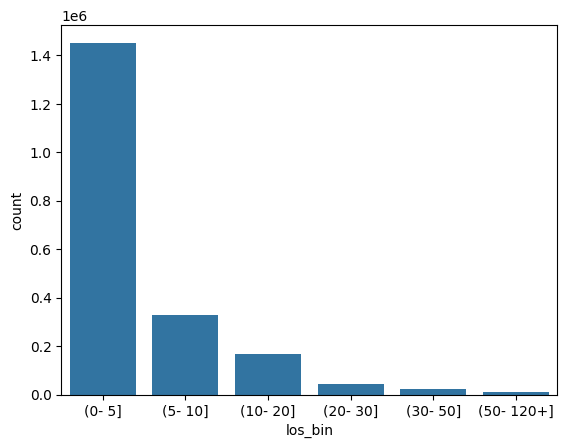

In [ ]:
df["los_bin"]=df["los_bin"].apply(lambda x: str(x).replace(",","-")) #loss_bin deki virgülü - ile değiştirdik
df["los_bin"]=df["los_bin"].apply(lambda x: str(x).replace("120","120+"))

f,ax=plt.subplots()
sns.countplot(x="los_bin",data=df)


In [32]:
new_X=df.drop(columns=["Length of Stay","los_bin","los_label"],axis=1)
new_y=df["los_label"]

X_train,X_test,y_train,y_test=train_test_split(new_X,new_y,test_size=0.2,random_state=42)

In [33]:
dtree_cls=DecisionTreeClassifier()
dtree_cls.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
from sklearn.metrics import accuracy_score
train_prediction=dtree_cls.predict(X_train)
test_prediction=dtree_cls.predict(X_test)

print("Train Accuracy:",accuracy_score(train_prediction,y_train))
print("Test Accuracy:",accuracy_score(test_prediction,y_test))

Train Accuracy: 0.9244704097809807
Test Accuracy: 0.6853421144223957


In [42]:
print(classification_report(y_test,test_prediction))



              precision    recall  f1-score   support

           5       0.80      0.96      0.87    290828
          10       0.36      0.18      0.24     65845
          20       0.37      0.23      0.28     33085
          30       0.52      0.05      0.09      8771
          50       0.35      0.06      0.10      4363
         120       0.54      0.27      0.36      2221

    accuracy                           0.74    405113
   macro avg       0.49      0.29      0.32    405113
weighted avg       0.68      0.74      0.69    405113



In [ ]:
### yorumlar
# Toplam örnek: 405,113

# Sınıf dağılımı (oranlar):

# 5: 290,828 (%71.8)

# 10: 65,845 (%16.3)

# 20: 33,085 (%8.2)

# 30: 8,771 (%2.2)

# 50: 4,363 (%1.1)

# 120: 2,221 (%0.5)

# Veri aşırı dengesiz; sınıf 5 çoğunluk.

# Precision (Kesinlik): “Bu sınıf diye tahmin ettiklerimin kaçı doğru?”

# Recall (Duyarlılık): “Bu sınıfa ait gerçek örneklerin kaçı yakalandı?”

# F1: Precision & Recall’un dengeli ortalaması (düşük olan tarafa duyarlı).

# Accuracy: Tüm örneklerin içinde doğru oranı.

# macro avg: Her sınıfa eşit ağırlık vererek ortalama (dengesiz veri için adildir).

# weighted avg: Her sınıfı destek (support) ile ağırlıklar (çoğunluk sınıf baskın çıkar).

# Sınıf 5 çok iyi yakalanmış: Precision 0.80, Recall 0.96, F1 0.87
# → Gerçek 5’lerin %96’sı bulunmuş. (≈ 279,195 doğru)

# Az görülen sınıflar çok zayıf:

# 30: Recall 0.05 ⇒ 8,771 örneğin sadece ~439’u doğru

# 50: Recall 0.06 ⇒ 4,363 örneğin ~262’si doğru

# 120: Recall 0.27 ⇒ 2,221 örneğin ~600’ü doğru

# 10: Recall 0.18 ⇒ 65,845’in ~11,852’si doğru

# 20: Recall 0.23 ⇒ 33,085’in ~7,610’u doğru

# Model çoğunlukla “5” diyor; az olan sınıfları kaçırıyor (çok düşük recall).
# Bu yüzden accuracy 0.74 yüksek görünse de, macro F1 = 0.32 → “küçük sınıflar” kötü.



In [40]:
#overfitting i azaltmak için max_depth parametresini kullanabiliriz
#max_depth=10 yapalım bakalım ne olacak
dtree_cls=DecisionTreeClassifier(max_depth=10)
dtree_cls.fit(X_train,y_train)
train_prediction=dtree_cls.predict(X_train)
test_prediction=dtree_cls.predict(X_test)

print("Train Accuracy:",accuracy_score(train_prediction,y_train))
print("Test Accuracy:",accuracy_score(test_prediction,y_test))

Train Accuracy: 0.7418194070663043
Test Accuracy: 0.7410722440405516
